## Statistik des radioaktiven Zerfalls

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import gamma
from numpy import exp, pi, sqrt
from scipy.stats import chi2

Mittelwert: 13.68 Fehler: 1.1598068804762283


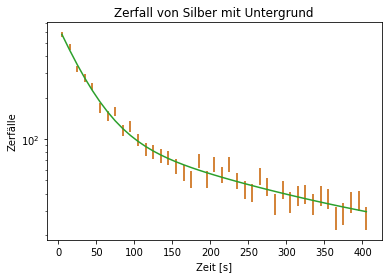

A1= 542.6882276838744 , Standardfehler= 24.37833747984282
l1= 0.032284867499511344 , Standardfehler= 0.002472331996826924
A2= 104.69888293186725 , Standardfehler= 14.834824757444748
l2= 0.004648898581684356 , Standardfehler= 0.0005555050275826039
chi2= 34.282414498596545
chi2_red= 0.926551743205312
Washrscheinlichkeit =  60.0 %


In [2]:
unterg = np.loadtxt('./UntergrundAgCI.dat', usecols = [1])
mittelw_unterg = np.mean(4*unterg)
fehler_unterg = np.std(4*unterg)/np.sqrt(len(unterg))
print('Mittelwert:', mittelw_unterg, 'Fehler:', fehler_unterg) #alle Zerfälle


# In[59]:

n1 = np.loadtxt('./ag1ci.dat', usecols=[1])
n2 = np.loadtxt('./ag2ci.dat', usecols=[1])
n3 = np.loadtxt('./ag3ci.dat', usecols=[1])
n4 = np.loadtxt('./ag4ci.dat', usecols=[1])
N = n1 + n2 + n3 + n4
Fehler_N = np.sqrt(N)
t = np.arange(5,415,10)
plt.errorbar(t,N,Fehler_N,linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')


# In[66]:

y0 = mittelw_unterg #Untergrund

def fit_func(x, A1,l1, A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

popt, pcov = curve_fit(fit_func, t, N, p0 = [500, 0.02, 50, 0.001], sigma = Fehler_N)

plt.errorbar(t, N, Fehler_N, linestyle = 'None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.plot(t, fit_func(t, *popt))
#plt.savefig('figures/Silber.pdf', format = 'pdf')

plt.show()

print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("A2=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("l2=",popt[3], ", Standardfehler=", np.sqrt(pcov[3][3]))

chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
prob = round(1-chi2.cdf(chi2_,dof),2)*100
print('Washrscheinlichkeit = ', prob, '%')

Mittelwert: 56.816326530612244 Fehler: 4.181599632282424


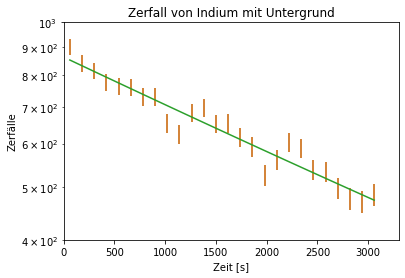

A1= 811.0210502462531 , Standardfehler= 14.951987928007311
l1= 0.00021501196861143095 , Standardfehler= 1.12839206785183e-05
chi2= 33.79650898203152
chi2_red= 1.4081878742513132
Washrscheinlichkeit =  9.0 %


In [3]:
unterg0 = 12*np.loadtxt('./UntergrundAgCI1.dat', usecols = [1])
mittelw_unterg0 = np.mean(unterg0)
fehler_unterg0 = np.std(unterg0)/np.sqrt(len(unterg0))
print('Mittelwert:', mittelw_unterg0, 'Fehler:', fehler_unterg0) #alle Zerfälle

N = np.loadtxt('./inci.dat', usecols=[1])
Fehler_N = np.sqrt(N)
t = np.arange(60,26*120+60,120)
plt.errorbar(t,N,Fehler_N,linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')

y0 = mittelw_unterg0 - fehler_unterg0 #Untergrund

def fit_func(x, A1,l1):
    return A1*np.exp(-x*l1) + y0

popt, pcov = curve_fit(fit_func, t, N, p0 = [500, 0.02], sigma = Fehler_N)

def fit_func(x, A1,l1):
    return A1*np.exp(-x*l1) + y0

popt, pcov = curve_fit(fit_func, t, N, p0 = [500, 0.02], sigma = Fehler_N)

plt.errorbar(t, N, Fehler_N, linestyle = 'None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.plot(t, fit_func(t, *popt))
plt.axis([0,3300,400,1000])
#plt.savefig('figures/Silber.pdf', format = 'pdf')
plt.show()

print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))

chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-2 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
prob = round(1-chi2.cdf(chi2_,dof),2)*100
print('Washrscheinlichkeit = ', prob, '%')

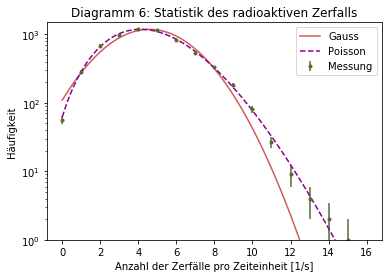

Gaussfit:
A= 6238.395954992112 , Standardfehler =  309.08418379220797
mu= 4.581895079464203 , Standardfehler =  0.10724248945813598
sig= 2.098757808867501 , Standardfehler =  0.08350743952291322
Poissonfit:
A_p= 6351.860442170869 , Standardfehler =  73.64685992534186
mu_p= 4.627459533214789 , Standardfehler =  0.024855613995581907
chi2_g= 166.90742373889896
chi2_red_g= 15.173402158081723
chi2_p= 10.24339512254083
chi2_red_p= 0.8536162602117359
Wahrscheinlichkeit Gauss= 0.0 %
Wahrscheinlichkeit Poisson= 59.0 %


In [4]:
anzahl, haeufigkeit = np.loadtxt('./carolinaiuliia.dat', unpack = True)
fehler = np.sqrt(haeufigkeit)

plt.figure(1)

def gaussian(x, A, mu, sig):
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)

popt, pcov = curve_fit(gaussian,anzahl[0:14], haeufigkeit[0:14], p0=[6363,4.632,2.144], sigma = fehler[0:14])


def poisson (x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[0:14], haeufigkeit[0:14], p0=[6363,4.632], sigma = fehler[0:14])

plt.errorbar(anzahl, haeufigkeit,fehler,fmt='.', label = 'Messung', color = 'darkolivegreen')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [1/s]')
plt.ylabel('Häufigkeit')
plt.title('Diagramm 6: Statistik des radioaktiven Zerfalls')
x = np.linspace(0,16,100)
plt.yscale('log')
plt.ylim((1,1500))
plt.plot(x, gaussian(x,*popt), label = 'Gauss', color = 'indianred')
plt.plot(x, poisson(x,*popt_p), label = 'Poisson', linestyle = '--', color = 'darkmagenta')
plt.legend()
plt.show()


print('Gaussfit:')
print('A=', popt[0], ', Standardfehler = ', np.sqrt(pcov[0][0]))
print('mu=', popt[1], ', Standardfehler = ', np.sqrt(pcov[1][1]))
print('sig=', popt[2], ', Standardfehler = ', np.sqrt(pcov[2][2]))

print('Poissonfit:')
print('A_p=', popt_p[0], ', Standardfehler = ', np.sqrt(pcov_p[0][0]))
print('mu_p=', popt_p[1], ', Standardfehler = ', np.sqrt(pcov_p[1][1]))

#Gauss:
chi2_g = np.sum((gaussian(anzahl[0:14],*popt)-haeufigkeit[0:14])**2/fehler[0:14]**2)
dof_g=len(anzahl[0:14])-3
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=", chi2_red_g)

#Poisson:
chi2_p=np.sum((poisson(anzahl[0:14], *popt_p)-haeufigkeit[0:14])**2/fehler[0:14]**2)
dof_p=len(anzahl[0:14])-2
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=", chi2_red_p)


#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

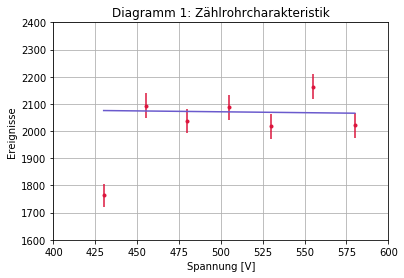

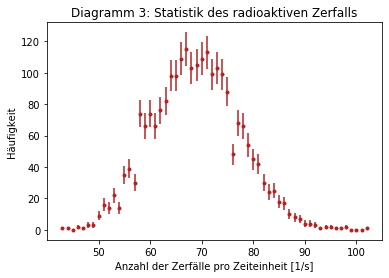

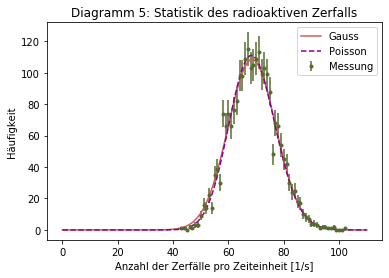

Gaussfit:
A= 2340.6255643437835 , Standardfehler =  56.840025346783385
mu= 68.52048996553316 , Standardfehler =  0.24410558938158586
sig= 8.603382966362796 , Standardfehler =  0.21790073377862051
Poissonfit:
A_p= 2308.8401508425195 , Standardfehler =  53.89628896419666
mu_p= 68.80801144131755 , Standardfehler =  0.21754950365018047
chi2_g= 39.28018346403115
chi2_red_g= 1.1903085898191257
chi2_p= 40.656417383608144
chi2_red_p= 1.1957769818708277
Wahrscheinlichkeit Gauss= 21.0 %
Wahrscheinlichkeit Poisson= 20.0 %


In [5]:
def linear(x,a,b):
    return a*x+b

U = np.array([430,455,480,505,530,555,580])
N = np.array([1763,2094,2037,2087,2017,2163,2021])
fehler_N = np.sqrt(N)

popt, pcov = curve_fit(linear, U[1:], N[1:])

plt.errorbar(U,N, fehler_N, fmt = '.', color = 'crimson')
plt.plot(U, linear(U,*popt), color = 'slateblue')
plt.xlabel('Spannung [V]')
plt.ylabel('Ereignisse')
plt.axis([400,600,1600,2400])
plt.grid()
plt.title('Diagramm 1: Zählrohrcharakteristik')



plt.show()



anzahl, haeufigkeit = np.loadtxt('./iuliiacarolina.dat', unpack = True)
fehler = np.sqrt(haeufigkeit)

plt.figure(1)
plt.errorbar(anzahl, haeufigkeit, fehler, fmt = '.', color = 'firebrick')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [1/s]')
plt.ylabel('Häufigkeit')
plt.title('Diagramm 3: Statistik des radioaktiven Zerfalls')

plt.figure(2)

def gaussian(x, A, mu, sig):
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)

popt, pcov = curve_fit(gaussian,anzahl[12:-12], haeufigkeit[12:-12], p0=[2350,68.851,8.423], sigma = fehler[12:-12])


def poisson (x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[12:-12], haeufigkeit[12:-12], p0=[2350,68.851], sigma = fehler[12:-12])

plt.errorbar(anzahl, haeufigkeit,fehler,fmt='.', label = 'Messung', color = 'darkolivegreen')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [1/s]')
plt.ylabel('Häufigkeit')
plt.title('Diagramm 5: Statistik des radioaktiven Zerfalls')
x = np.linspace(0,110,100)
plt.plot(x, gaussian(x,*popt), label = 'Gauss', color = 'indianred')
plt.plot(x, poisson(x,*popt_p), label = 'Poisson', linestyle = '--', color = 'darkmagenta')
plt.legend()
plt.show()


print('Gaussfit:')
print('A=', popt[0], ', Standardfehler = ', np.sqrt(pcov[0][0]))
print('mu=', popt[1], ', Standardfehler = ', np.sqrt(pcov[1][1]))
print('sig=', popt[2], ', Standardfehler = ', np.sqrt(pcov[2][2]))

print('Poissonfit:')
print('A_p=', popt_p[0], ', Standardfehler = ', np.sqrt(pcov_p[0][0]))
print('mu_p=', popt_p[1], ', Standardfehler = ', np.sqrt(pcov_p[1][1]))

#Gauss:
chi2_g = np.sum((gaussian(anzahl[12:-12],*popt)-haeufigkeit[12:-12])**2/fehler[12:-12]**2)
dof_g=len(anzahl[12:-12])-3
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=", chi2_red_g)

#Poisson:
chi2_p=np.sum((poisson(anzahl[12:-12], *popt_p)-haeufigkeit[12:-12])**2/fehler[12:-12]**2)
dof_p=len(anzahl[12:-12])-2
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=", chi2_red_p)


#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")